<img style="float: right;" src="https://img.pc841.com/2017/1214/20171214041431577.jpg",width='1000',height='600'>


In [1]:
#简单看一下训练集数据情况
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline
a=pd.read_csv('d:/sklearn/train1.csv')

a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [2]:
#共有4446966行数据 29个字段
a.shape

(4446966, 29)

In [3]:
a.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
#对测试集进行分析
b=pd.read_csv('d:/sklearn/test1.csv')
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
dtypes: float64(5), int64(19), object(4)
memory usage: 413.2+ MB


In [5]:
#测试集共有1934174行数据，28个字段，缺少的字段名称为winPlacePerc
b.shape

(1934174, 28)

In [6]:
#判断缺失值的个数:训练集存在缺失值 而测试集则不存在
print(a.isnull().sum().sum())
print(b.isnull().sum().sum())

1
0


In [7]:
#判断训练集哪个特征有空值并用进行填充
nan=a.isnull().any()
print(nan)

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool


In [8]:
a['winPlacePerc']=a['winPlacePerc'].fillna(a['winPlacePerc'].median())
a.isnull().sum().sum()
#以上保证了数据集的完整

0

In [9]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


字段含义：
-*DBNOs*：被击倒的敌方玩家数量。
-*assists*：被队友击伤的敌方球员数量。
-*boosts*：使用的助推器项目数。
-*damageDealt*：造成的全部损坏。注：减去自身造成的伤害。
-*headshotkills*：用headshots杀死的敌方玩家数量。
-*heals*:使用的治疗项目数。
-*killPlace*:在杀死的敌方玩家数量的比赛中排名。
-*killPoints*:基于玩家外部排名的杀戮。（把这看作是一个ELO排名，其中只有杀死物质。）
-*killStreaks* :在短时间内杀死的敌人玩家的最大数量。
-*kills*:被杀的敌方玩家数量。
-*longestkill*:死亡时玩家与被杀玩家之间的最长距离。这可能会误导玩家，因为击倒一名玩家并将           其驱走可能会导致一个巨大的longestkill属性。
-*matchID*:用于标识匹配的整数ID。训练和测试集中都没有匹配项。
-*revives*:这个球员复活队友的次数。
-*rideDistance*:以米为单位的车辆总行驶距离。
-*roadKills*:车辆内的撞车次数。
-*swimDistance*:以米为单位的游泳总距离。
-*TeamKills*:该玩家杀死队友的次数。
-*vehicleDestroys*:被摧毁的车辆数量。
-*walkDistance* :步行总距离，以米为单位。
-*weaponsAcquired *:所携带武器的数量。
-*Winpoints*:基于Win的玩家外部排名。（把这看作是一个只有胜利才重要的ELO排名。）
-*group id*:用于标识匹配中的组的整数id。如果同一组玩家在不同的比赛中玩，他们每次都会有不          同的groupid。
-*numgroups*:我们在匹配中有数据的组数。
-*MaxPlace*:我们在匹配中有数据的最差位置。这可能与numgroups不匹配，因为有时数据跳过放置。
-*winplaceperc*:预测的目标。这是一个百分位数的获胜位置，1代表第一名，0代表比赛的最后一              名。它是根据maxplace而不是numgroups计算的，因此在匹配中可能有丢失的块

In [10]:
#找到排名前10的相关特征 用热力图的方式呈现
corrdf=a.corr()
corrdf['winPlacePerc'].sort_values(ascending=False)[:10]


winPlacePerc       1.000000
walkDistance       0.810887
boosts             0.634234
weaponsAcquired    0.583806
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
killStreaks        0.377566
rideDistance       0.342915
Name: winPlacePerc, dtype: float64

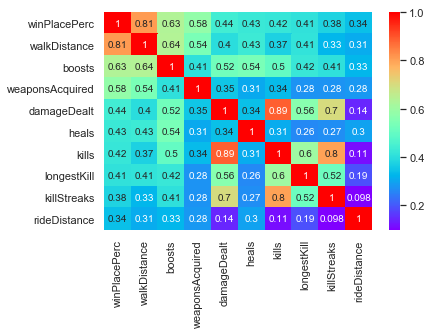

In [11]:
data=a[['winPlacePerc','walkDistance','boosts','weaponsAcquired','damageDealt','heals','kills','longestKill','killStreaks','rideDistance']]
hm=sns.heatmap(data.corr(),annot=True,cmap='rainbow')

*对相关特征进行分析*

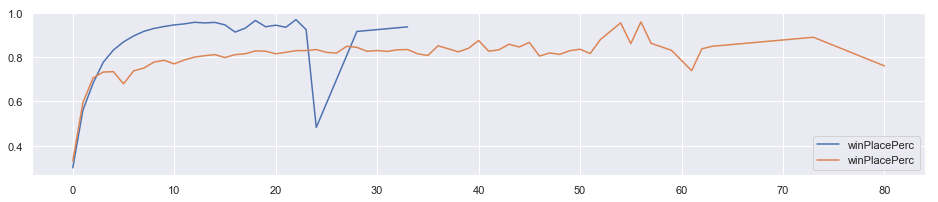

In [12]:
#Boost and Heals
plt.subplots(figsize=(16, 3))#两个图像共享横纵轴
cols = ['boosts','heals']

for col in (cols): 
    plt.plot(a[col].groupby(a[col]).mean(),a['winPlacePerc'].groupby(a[col]).mean())
plt.legend()
plt.show()

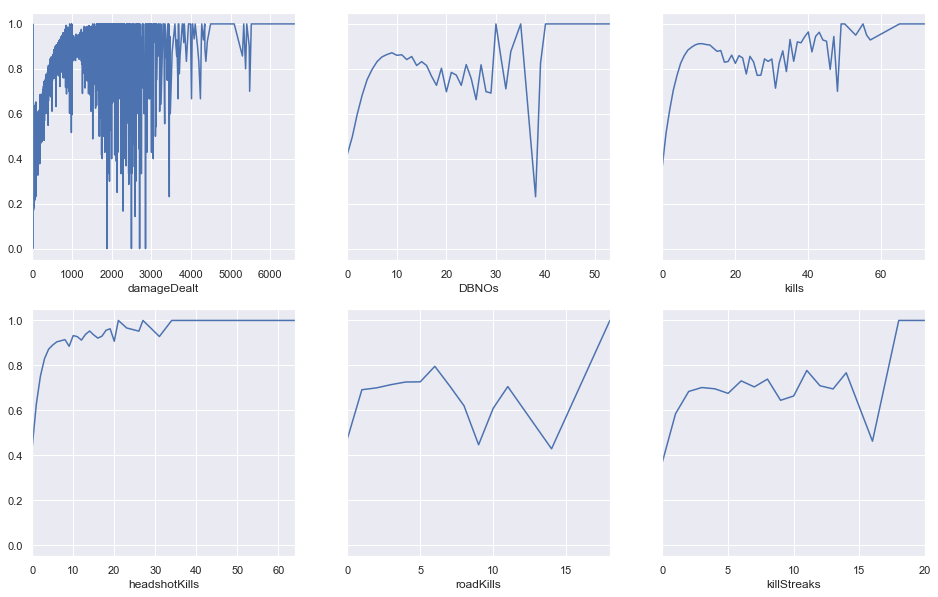

In [13]:
#'damageDealt','DBNOs','kills','headshotKills','roadKills','killStreaks'
fig, ax = plt.subplots(2, 3, figsize=(16, 10), sharey=True)
cols = ['damageDealt','DBNOs','kills','headshotKills','roadKills','killStreaks']
for col, ax in zip(cols, ax.ravel()):# 同时在subplots里建立一个fig对象，建立一个axis对象 
    a.groupby(col).mean()['winPlacePerc'].plot.line(ax=ax)

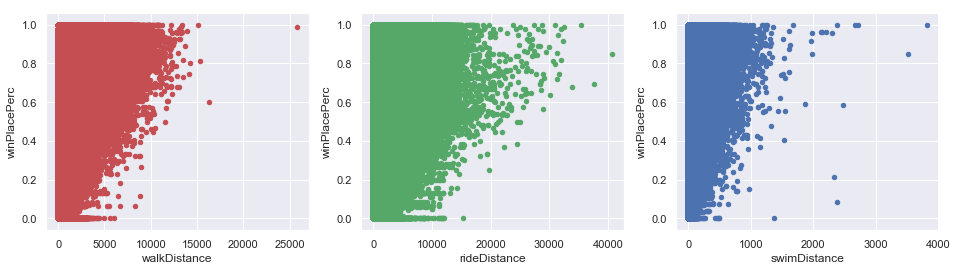

In [14]:
##WalkDistance, RideDistance, SwimDistance
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
a.plot.scatter(x='walkDistance', y='winPlacePerc',c='r', ax=ax[0])
a.plot.scatter(x='rideDistance', y='winPlacePerc',c='g', ax=ax[1])
a.plot.scatter(x='swimDistance', y='winPlacePerc', ax=ax[2])


85.4579%死亡时玩家与被杀玩家之间的最长距离比50m少


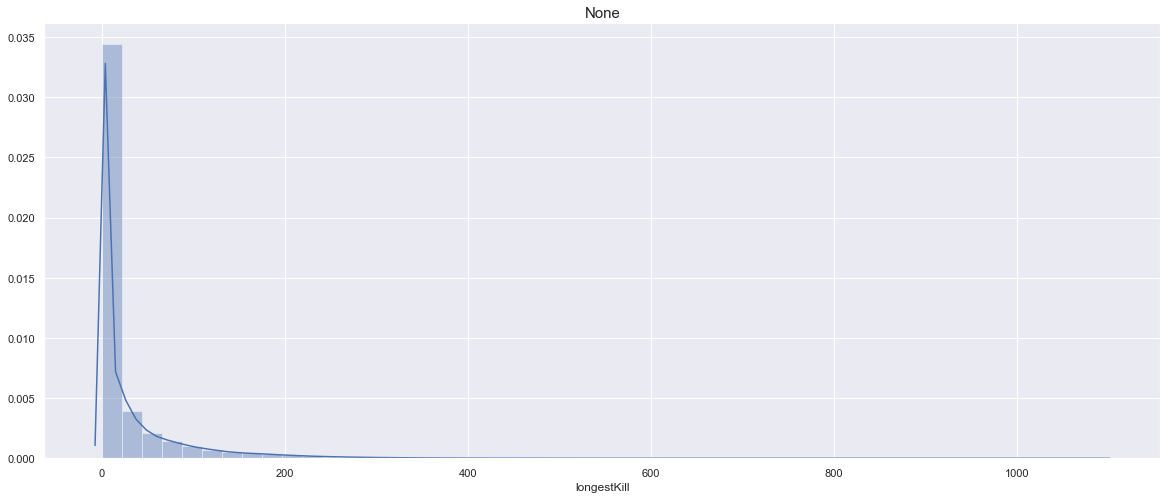

In [15]:
#longestkill
plt.figure(figsize=(20,8))
sns.distplot(a.longestKill)
plt.title(print('{:.4f}%死亡时玩家与被杀玩家之间的最长距离比50m少'.format(len(a[a['longestKill'] <= 50])*100/len(a))),fontsize=15)
plt.show()

99.8565%的玩家短时间内杀死敌人的数量比3少


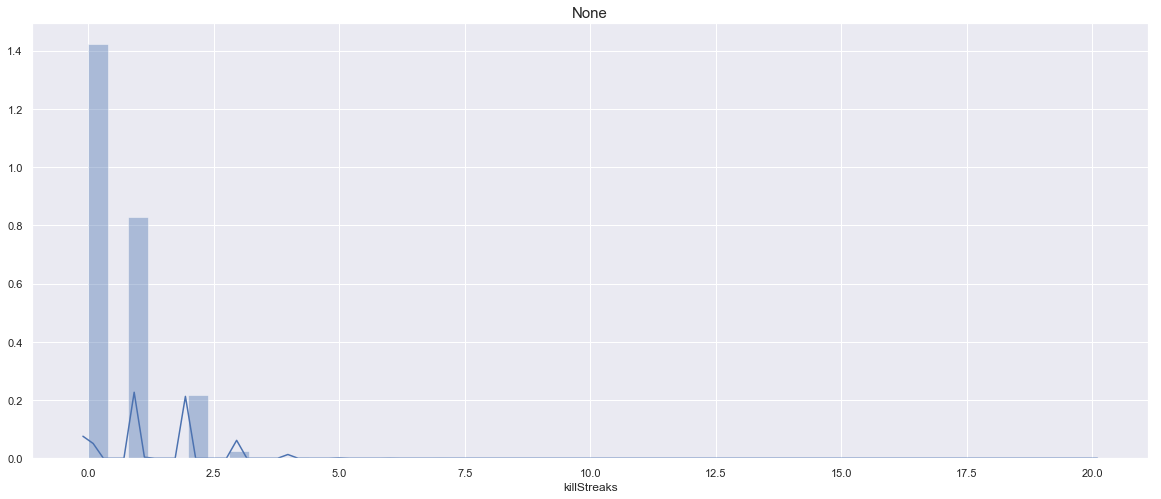

In [16]:
#killstreaks
plt.figure(figsize=(20,8))
sns.distplot(a.killStreaks)
plt.title(print('{:.4f}%的玩家短时间内杀死敌人的数量比3少'.format(len(a[a['killStreaks'] <= 3])*100/len(a))),fontsize=15)
plt.show()

In [17]:
#模型训练 线性回归
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
feature=['walkDistance','boosts','weaponsAcquired','damageDealt',
         'heals','kills','longestKill','killStreaks','rideDistance']
def plot_fitting_line(reg,x,y,feat):
    w=reg.coef_
    b=reg.intercept_
    plt.figure(figsize=[6,6])
    plt.scatter(x,y,alpha=.5,c='orange')
    plt.plot(x,w*x+b,c='blue',alpha=.5)
    
    plt.title(feat)
    plt.show()

In [18]:
#标准化做处理
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


特征：walkDistance,分数0.6572881227255416


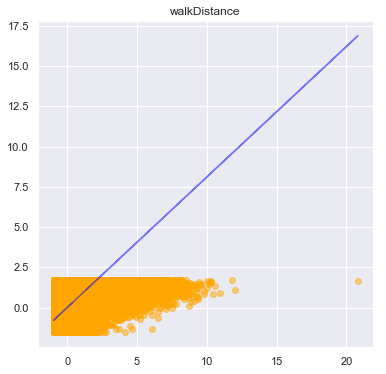

D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


特征：boosts,分数0.4019727050927951


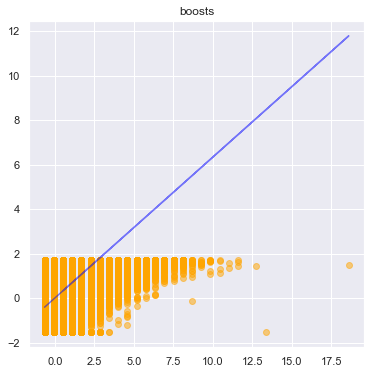

D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


特征：weaponsAcquired,分数0.3422295779366684


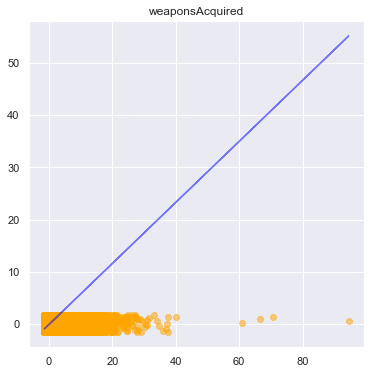

特征：damageDealt,分数0.1930474039375738


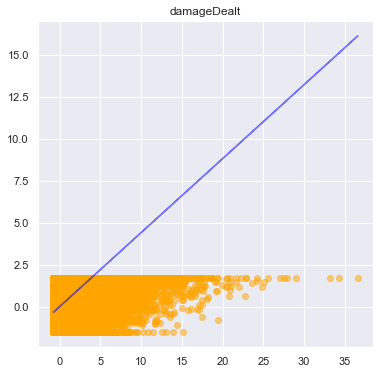

D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


特征：heals,分数0.1835409257099897


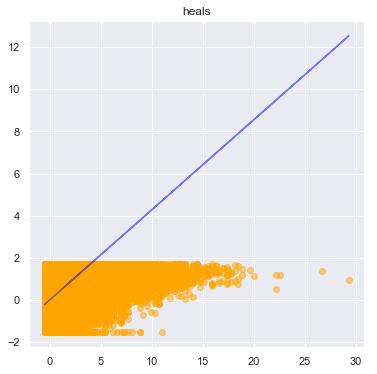

D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


特征：kills,分数0.17543632594394465


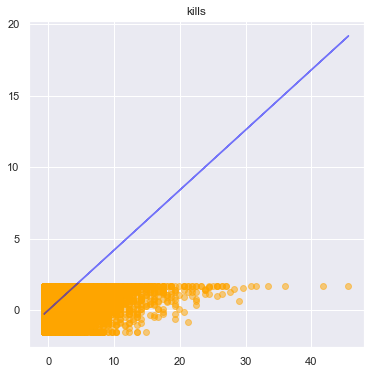

特征：longestKill,分数0.16822819581387727


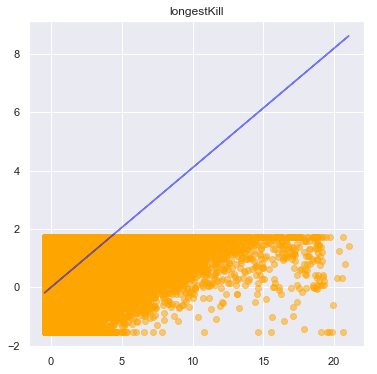

D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ana\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


特征：killStreaks,分数0.14233376236582318


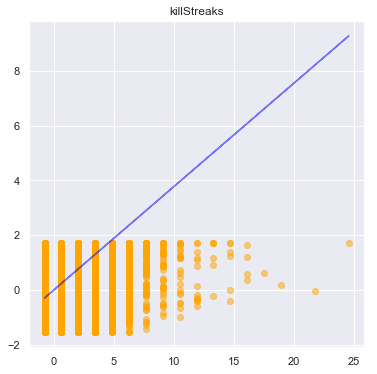

特征：rideDistance,分数0.11812466032509882


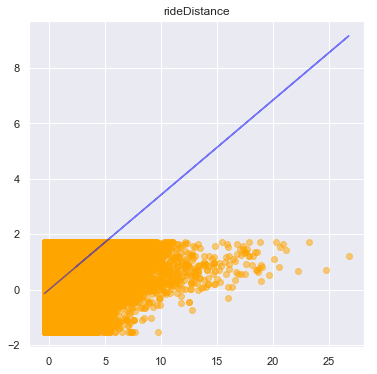

In [19]:
def begain():
    for feat in feature:
        x=a[feat].values.reshape(-1,1)
        y=a['winPlacePerc'].values.reshape(-1,1)
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=0)
        n_xtrain=std.fit_transform(xtrain)
        n_xtest=std.fit_transform(xtest)
        n_ytrain=std.fit_transform(ytrain)#行向量变成列向量
        n_ytest=std.fit_transform(ytest)
        reg=lr()
        reg.fit(n_xtrain,n_ytrain)
        score=reg.score(n_xtest,n_ytest)
        print('特征：{},分数{}'.format(feat,score))
        plot_fitting_line(reg,n_xtrain,n_ytrain,feat)
if __name__ == '__main__':#运行的方式 让两个函数运行
    begain()

In [20]:
#内存的妥协：取前1W个
ntrain=a.drop(['Id','groupId','matchId','winPlacePerc','matchType'],axis=1)
ntrain=ntrain[:10000].values
ntrain[:5]

array([[ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  6.000e+01,  1.241e+03,  0.000e+00,  0.000e+00,
         0.000e+00,  1.306e+03,  2.800e+01,  2.600e+01, -1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  2.448e+02,  1.000e+00,  1.466e+03],
       [ 0.000e+00,  0.000e+00,  9.147e+01,  0.000e+00,  0.000e+00,
         0.000e+00,  5.700e+01,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  1.777e+03,  2.600e+01,  2.500e+01,  1.484e+03,
         0.000e+00,  4.500e-03,  0.000e+00,  1.104e+01,  0.000e+00,
         0.000e+00,  1.434e+03,  5.000e+00,  0.000e+00],
       [ 1.000e+00,  0.000e+00,  6.800e+01,  0.000e+00,  0.000e+00,
         0.000e+00,  4.700e+01,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  1.318e+03,  5.000e+01,  4.700e+01,  1.491e+03,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  1.618e+02,  2.000e+00,  0.000e+00],
       [ 0.00

In [21]:
ntest=b.drop(['Id','groupId','matchId','matchType'],axis=1).values
ntest[:5]

array([[0.000e+00, 0.000e+00, 5.146e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        7.300e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.884e+03,
        2.800e+01, 2.800e+01, 1.500e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.880e+02, 1.000e+00, 0.000e+00],
       [0.000e+00, 4.000e+00, 1.791e+02, 0.000e+00, 0.000e+00, 2.000e+00,
        1.100e+01, 0.000e+00, 2.000e+00, 1.000e+00, 3.619e+02, 1.811e+03,
        4.800e+01, 4.700e+01, 1.503e+03, 2.000e+00, 4.669e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.017e+03, 6.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 2.340e+01, 0.000e+00, 0.000e+00, 4.000e+00,
        4.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.793e+03,
        2.800e+01, 2.700e+01, 1.565e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 7.878e+02, 4.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 6.552e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        5.400e+01, 0.000e+00, 0.000

In [22]:
#为了预测分类先*10000 最后结果在/10000
nlabel=a['winPlacePerc']*10000
nlabel=nlabel[:10000].values
nlabel[:5]

array([4444., 6400., 7755., 1667., 1875.])

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
nnlabel=nlabel.astype('int')
nnlabel[:20]

array([4444, 6400, 7755, 1666, 1875,  370,    0, 7368, 3704, 2143, 3929,
       4043, 9286, 8750, 9000, 2766, 7308, 8211, 1923, 9310])

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(ntrain,nnlabel,test_size=0.3,random_state=0)
rfc=RandomForestClassifier(n_estimators=10)
score=cross_val_score(rfc,ntrain,nnlabel,cv=10)

D:\ana\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [26]:
score.mean()

0.11866282769799201

In [27]:
#接下来该思考怎么样提升分数
print('*'*140)

********************************************************************************************************************************************


In [28]:
rfc.fit(ntrain,nnlabel)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
feat=a.drop(['Id','groupId','matchId','winPlacePerc','matchType'],axis=1)
for i in indices:
    print ("{0} - {1:.3f}".format(feat.columns[i], importances[i]))

walkDistance - 0.111
killPlace - 0.106
matchDuration - 0.096
maxPlace - 0.080
damageDealt - 0.075
rankPoints - 0.072
numGroups - 0.071
weaponsAcquired - 0.058
killPoints - 0.046
winPoints - 0.046
longestKill - 0.039
rideDistance - 0.030
heals - 0.030
boosts - 0.028
DBNOs - 0.022
kills - 0.019
assists - 0.016
revives - 0.014
killStreaks - 0.013
headshotKills - 0.013
swimDistance - 0.010
teamKills - 0.005
vehicleDestroys - 0.001
roadKills - 0.001


In [29]:
#后三项不要了
train2=a[['walkDistance', 
'killPlace',
'matchDuration' ,
'maxPlace', 
'numGroups',
'damageDealt', 
'rankPoints' ,
'weaponsAcquired', 
'winPoints' ,
'killPoints' ,
'longestKill' ,
'heals',
'rideDistance' ,
'boosts' ,
'DBNOs' ,
'kills', 
'assists' ,
'revives', 
'killStreaks', 
'headshotKills', 
'swimDistance' ]][:10000].values
score2=cross_val_score(rfc,train2,nnlabel,cv=10)
score2.mean()

D:\ana\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.12398088993286785

In [30]:
print('*'*140)

********************************************************************************************************************************************


In [31]:
#分数有所提升 整体中心化降维看看
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
train3=StandardScaler().fit_transform(train2)
train3[:5]

array([[-0.76596957,  0.44549351, -1.05759359, -0.69465557, -0.73398572,
        -0.76689372, -1.20278861, -1.10894008,  1.15318078,  1.16235907,
        -0.45209511, -0.51487284, -0.40682757, -0.64058494, -0.57826257,
        -0.59737195, -0.40015626, -0.35038407, -0.75799334, -0.38736809,
        -0.14650101],
       [ 0.25115051,  0.33642422,  0.77402753, -0.77894309, -0.77712481,
        -0.23294472,  0.81134494,  0.56209413, -0.8266189 , -0.81090851,
        -0.45209511, -0.51487284, -0.40682457, -0.64058494, -0.57826257,
        -0.59737195, -0.40015626, -0.35038407, -0.75799334, -0.38736809,
         0.23022897],
       [-0.83695928, -0.02714007, -1.01092809,  0.23250712,  0.17193515,
        -0.36994902,  0.82083917, -0.69118153, -0.8266189 , -0.81090851,
        -0.45209511, -0.51487284, -0.40682757, -0.64058494, -0.57826257,
        -0.59737195,  1.35568516, -0.35038407, -0.75799334, -0.38736809,
        -0.14650101],
       [-0.8019776 ,  0.99083996, -0.55205061, -0.56822429

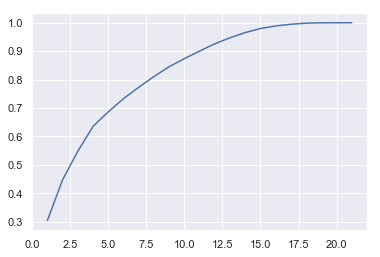

In [32]:
#画出降维曲线 选取让其平滑的点
pca_line=PCA().fit(train3)
plt.plot(np.arange(1,22,1),np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks=(np.arange(1,22,1))
plt.show()
#所以选取18

In [33]:
train3=PCA(n_components=18).fit_transform(train2)
score3=cross_val_score(rfc,train3,nnlabel,cv=10)
score3.mean()    
    


D:\ana\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.070844148642172

In [36]:
#分数有所下降 试试网格搜索
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [37]:
parameter_grid = {'max_depth': [5,6,7,8],
                  'criterion': ['gini', 'entropy'],
                  'min_samples_leaf':[2,4,6,8],
                 'min_samples_split':[2,4,6,8]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(rfc,
                           param_grid=parameter_grid,
                           cv=cross_validation,n_jobs=1)

grid_search.fit(train3[:1000], nnlabel[:1000])
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

D:\ana\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best score: 0.081
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}


D:\ana\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
rfc=grid_search.best_estimator_
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
from sklearn.model_selection import train_test_split
(xtrain,xtest,ytrain,ytest) = train_test_split(train3,nnlabel,test_size=0.4)
for prediction, actual in zip(rfc.predict(xtest[:20]),ytest[:20]):
    print('{}\t(Actual: {})'.format(prediction/10000, actual/10000))

0.4074	(Actual: 0.6429)
1.0	(Actual: 1.0)
0.5	(Actual: 0.6923)
1.0	(Actual: 0.7856)
1.0	(Actual: 0.56)
0.3704	(Actual: 0.837)
0.1666	(Actual: 0.4074)
0.702	(Actual: 0.2083)
0.25	(Actual: 0.25)
0.8276	(Actual: 0.4565)
0.2143	(Actual: 0.2826)
0.0	(Actual: 0.0741)
0.0	(Actual: 0.0851)
0.3704	(Actual: 0.6071)
0.9896	(Actual: 0.602)
0.125	(Actual: 0.2979)
0.3333	(Actual: 0.4)
0.4444	(Actual: 0.3011)
0.5	(Actual: 0.56)
0.2143	(Actual: 0.3076)


In [41]:
df=b[['walkDistance', 
'killPlace',
'matchDuration' ,
'maxPlace', 
'numGroups',
'damageDealt', 
'rankPoints' ,
'weaponsAcquired', 
'winPoints' ,
'killPoints' ,
'longestKill' ,
'heals',
'rideDistance' ,
'boosts' ,
'DBNOs' ,
'kills', 
'assists' ,
'revives', 
'killStreaks', 
'headshotKills', 
'swimDistance' ]][:10000]
pretest=df.values
pretest=StandardScaler().fit_transform(pretest)
pretest=PCA(n_components=18).fit_transform(pretest)

In [42]:
final=rfc.predict(pretest)
final=final/10000
final[:5]

array([0.25  , 0.25  , 0.3076, 0.5   , 0.25  ])

In [44]:
df['final']=pd.DataFrame(final)
df.head()

,walkDistance,killPlace,matchDuration,maxPlace,numGroups,damageDealt,rankPoints,weaponsAcquired,winPoints,killPoints,...,rideDistance,boosts,DBNOs,kills,assists,revives,killStreaks,headshotKills,swimDistance,final
0,588.0,73,1884,28,28,51.46,1500,1,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0.2500
1,2017.0,11,1811,48,47,179.10,1503,6,0,0,...,4669.0,4,0,2,0,2,1,0,0.0,0.2500
2,787.8,49,1793,28,27,23.40,1565,4,0,0,...,0.0,0,0,0,1,0,0,0,0.0,0.3076
3,1812.0,54,1834,45,44,65.52,1465,3,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0.5000
4,2963.0,7,1326,28,27,330.20,1480,4,0,0,...,0.0,4,1,3,0,1,1,2,0.0,0.2500


In [ ]:
0.12077882415344918 

all_input=a[['walkDistance','boosts','weaponsAcquired','damageDealt']][:1000].astype('category').values
all_labels=a['winPlacePerc'][:1000].values

from sklearn.decomposition import PCA
all_input=

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
all_labels = label_encoder.fit_transform(all_labels)

all_labels[:5]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

random_forest_classifier = RandomForestClassifier(n_estimators=10,n_jobs=1)

parameter_grid = {'max_depth': [3,4,5,6],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1,2,3]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation,n_jobs=1)

grid_search.fit(all_input, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

rfc=grid_search.best_estimator_
rfc

from sklearn.model_selection import train_test_split
(xtrain,xtest,ytrain,ytest) = train_test_split(all_input, all_labels, test_size=0.25)
for prediction, actual in zip(rfc.predict(xtest[:20]),ytest[:20]):
    print('{}\t(Actual: {})'.format(prediction, actual))

pre=b.copy()
pre=pre[['walkDistance','boosts','weaponsAcquired','damageDealt']]
pre.head()

data=pre[['walkDistance','boosts','weaponsAcquired','damageDealt']].astype('category').values
data=PCA(n_components=3).fit_transform(data)
data[:10]

ypre=rfc.predict(data[:30])
ypre

#为了内存 预测20行的
new=pd.DataFrame(ypre)
pre['winplacepre']=new
pre.head()